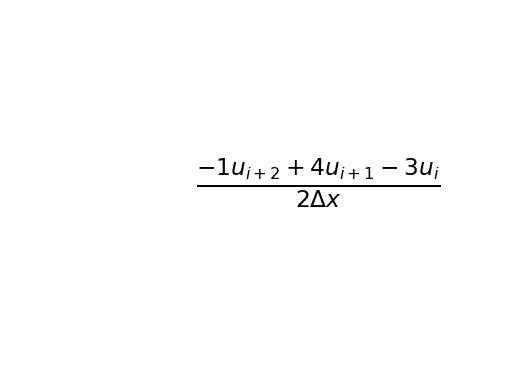

In [3]:
# Script to generate difference formulas for user-specified derivatives, scheme-type and order of accuracy

import numpy as np
import math
import matplotlib.pyplot as plt

def findMultiplier(sol):
    # This function will seek to convert fractional coefficients to integers
    # so output looks neat
    multiplier = 1
    count = 1
    while True:
        solNew = sol*multiplier
        solNew_ints = (np.rint(solNew)).astype(int)
        diff = abs(solNew_ints - solNew)
        if max(diff)<1e-4:
            break
        if count == 1000:
            multiplier = 1
            break
        multiplier = multiplier+1
        count = count+1
    return multiplier

def printDifferenceFormula(derivativeOrder,scheme,accuracyOrder):
    # Build and solve the linear system generated by equating the sum of certain terms
    # of the Taylor expansion to zero 
    if scheme == 'central':
        if (derivativeOrder+accuracyOrder)%2==0:
            if accuracyOrder%2==1:
                accuracyOrder = accuracyOrder + 1
            else:
                accuracyOrder = accuracyOrder - 1

        array = [np.ones(derivativeOrder+accuracyOrder)]
        for j in range(1,derivativeOrder+accuracyOrder):
            row = np.zeros(derivativeOrder+accuracyOrder)
            
            for i in range(1,derivativeOrder+accuracyOrder+1):
                row[i-1] = np.power(((derivativeOrder+accuracyOrder-1)/2)-(i-1),j)/math.factorial(j)

            array = np.append(array, [row], axis=0)

        rhs = (np.zeros(derivativeOrder+accuracyOrder))
        rhs[derivativeOrder] = 1

        sol = np.linalg.inv(array).dot(np.array([rhs]).T);
        denomCoeff = findMultiplier(sol)
        sol = (np.rint(sol*denomCoeff)).astype(int)

        listOfStencilPoints = []
        listOfStencilPoints.append('u_{i+'+str(np.rint((derivativeOrder+accuracyOrder-1)/2).astype(int))+'}')
        for i in range(1,sol.size):
            if np.rint((derivativeOrder+accuracyOrder-1)/2-i).astype(int)==0:
                listOfStencilPoints.append('u_{i}')
            elif (derivativeOrder+accuracyOrder-1)/2-i>0:
                listOfStencilPoints.append('u_{i+'+str(np.rint((derivativeOrder+accuracyOrder-1)/2-i).astype(int))+'}')
            elif (derivativeOrder+accuracyOrder-1)/2-i<0:
                listOfStencilPoints.append('u_{i-'+str(np.rint(abs((derivativeOrder+accuracyOrder-1)/2-i)).astype(int))+'}')
        
    elif scheme == 'backward' or scheme == 'forward':
        array = [np.ones(derivativeOrder+accuracyOrder)]
        for j in range(1,derivativeOrder+accuracyOrder):
            row = np.zeros(derivativeOrder+accuracyOrder)
            
            for i in range(1,derivativeOrder+accuracyOrder+1):
                row[i-1] = np.power(-(i-1),j)/math.factorial(j)

            array = np.append(array, [row], axis=0)

        rhs = (np.zeros(derivativeOrder+accuracyOrder))
        rhs[derivativeOrder] = 1

        # Solve the linear system
        sol = np.linalg.inv(array).dot(np.array([rhs]).T);
        denomCoeff = findMultiplier(sol)
        sol = (np.rint(sol*denomCoeff)).astype(int)

        listOfStencilPoints = []
        if scheme == 'backward':
            listOfStencilPoints.append('u_{i}')
            for i in range(1,sol.size):
                listOfStencilPoints.append('u_{i-'+str(i)+'}')
        else:
            listOfStencilPoints.append('u_{i+'+str(sol.size-1)+'}')
            for i in range(1,sol.size):
                if sol.size-1-i==0:
                    listOfStencilPoints.append('u_{i}')
                else:
                    listOfStencilPoints.append('u_{i+'+str(sol.size-1-i)+'}')
                    
            ### Reverse sol if scheme is "forward"
            sol = np.flipud(sol)
            if derivativeOrder%2==1:
                sol = -1*sol

    string = ''

    # Generate the string that will be output eventually
    for i in range(0,sol.size):

        if sol[i]!=0:
            if i == 0:
                if sol[i]==1:
                    string = listOfStencilPoints[i]
                else:
                    string = str(sol[i])+listOfStencilPoints[i]
            else:
                if sol[i]>0:
                    if sol[i]==1:
                        string = string+'+'+listOfStencilPoints[i]
                    else:
                        string = string+'+'+str(sol[i])+listOfStencilPoints[i]
                else:
                    if sol[i]==-1:
                        string = string+'-'+listOfStencilPoints[i]  
                    else:
                        string = string+str(sol[i])+listOfStencilPoints[i]

    if derivativeOrder > 1:
        if denomCoeff > 1:
            string = '\\frac{'+string+'}{'+str((denomCoeff))+'\Delta x^{'+str(derivativeOrder)+'}}'
        else:
            string = '\\frac{'+string+'}{\Delta x^{'+str(derivativeOrder)+'}}'
    else:
        if denomCoeff > 1:
            string = '\\frac{'+string+'}{'+str((denomCoeff))+'\Delta x}'
        else:
            string = '\\frac{'+string+'}{\Delta x}'
    new_string = string.replace("[", "" )
    new_string = new_string.replace("]", "" )
    plt.text(0.5 - 0.5*(sol.size/12), 0.5,'$%s$'%new_string, fontsize=24)
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    printDifferenceFormula(1,'forward',2)


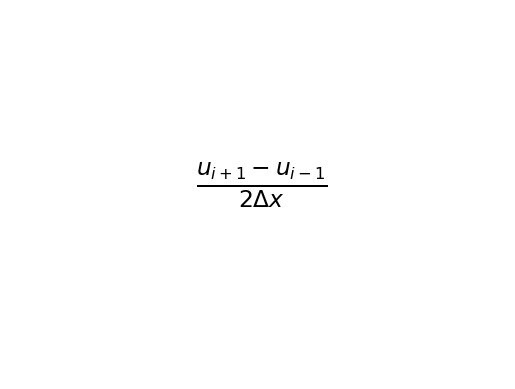

In [12]:
# Script to generate difference formulas for user-specified derivatives, scheme-type and order of accuracy

import numpy as np
import math
import matplotlib.pyplot as plt

def findMultiplier(sol):
    # This function will seek to convert fractional coefficients to integers
    # so output looks neat
    multiplier = 1
    count = 1
    while True:
        solNew = sol*multiplier
        solNew_ints = (np.rint(solNew)).astype(int)
        diff = abs(solNew_ints - solNew)
        if max(diff)<1e-4:
            break
        if count == 1000:
            multiplier = 1
            break
        multiplier = multiplier+1
        count = count+1
    return multiplier

def printDifferenceFormula(derivativeOrder,scheme,accuracyOrder):
    # Build and solve the linear system generated by equating the sum of certain terms
    # of the Taylor expansion to zero 
    if scheme == 'central':
        if (derivativeOrder+accuracyOrder)%2==0:
            if accuracyOrder%2==1:
                accuracyOrder = accuracyOrder + 1
            else:
                accuracyOrder = accuracyOrder - 1

        array = [np.ones(derivativeOrder+accuracyOrder)]
        for j in range(1,derivativeOrder+accuracyOrder):
            row = np.zeros(derivativeOrder+accuracyOrder)
            
            for i in range(1,derivativeOrder+accuracyOrder+1):
                row[i-1] = np.power(((derivativeOrder+accuracyOrder-1)/2)-(i-1),j)/math.factorial(j)

            array = np.append(array, [row], axis=0)

        rhs = (np.zeros(derivativeOrder+accuracyOrder))
        rhs[derivativeOrder] = 1

        sol = np.linalg.inv(array).dot(np.array([rhs]).T);
        denomCoeff = findMultiplier(sol)
        sol = (np.rint(sol*denomCoeff)).astype(int)

        listOfStencilPoints = []
        listOfStencilPoints.append('u_{i+'+str(np.rint((derivativeOrder+accuracyOrder-1)/2).astype(int))+'}')
        for i in range(1,sol.size):
            if np.rint((derivativeOrder+accuracyOrder-1)/2-i).astype(int)==0:
                listOfStencilPoints.append('u_{i}')
            elif (derivativeOrder+accuracyOrder-1)/2-i>0:
                listOfStencilPoints.append('u_{i+'+str(np.rint((derivativeOrder+accuracyOrder-1)/2-i).astype(int))+'}')
            elif (derivativeOrder+accuracyOrder-1)/2-i<0:
                listOfStencilPoints.append('u_{i-'+str(np.rint(abs((derivativeOrder+accuracyOrder-1)/2-i)).astype(int))+'}')
        
    elif scheme == 'backward' or scheme == 'forward':
        array = [np.ones(derivativeOrder+accuracyOrder)]
        for j in range(1,derivativeOrder+accuracyOrder):
            row = np.zeros(derivativeOrder+accuracyOrder)
            
            for i in range(1,derivativeOrder+accuracyOrder+1):
                row[i-1] = np.power(-(i-1),j)/math.factorial(j)

            array = np.append(array, [row], axis=0)

        rhs = (np.zeros(derivativeOrder+accuracyOrder))
        rhs[derivativeOrder] = 1

        # Solve the linear system
        sol = np.linalg.inv(array).dot(np.array([rhs]).T);
        denomCoeff = findMultiplier(sol)
        sol = (np.rint(sol*denomCoeff)).astype(int)

        listOfStencilPoints = []
        if scheme == 'backward':
            listOfStencilPoints.append('u_{i}')
            for i in range(1,sol.size):
                listOfStencilPoints.append('u_{i-'+str(i)+'}')
        else:
            listOfStencilPoints.append('u_{i+'+str(sol.size-1)+'}')
            for i in range(1,sol.size):
                if sol.size-1-i==0:
                    listOfStencilPoints.append('u_{i}')
                else:
                    listOfStencilPoints.append('u_{i+'+str(sol.size-1-i)+'}')
                    
            ### Reverse sol if scheme is "forward"
            sol = np.flipud(sol)
            if derivativeOrder%2==1:
                sol = -1*sol

    string = ''

    # Generate the string that will be output eventually
    for i in range(0,sol.size):

        if sol[i]!=0:
            if i == 0:
                if sol[i]==1:
                    string = listOfStencilPoints[i]
                else:
                    string = str(sol[i])+listOfStencilPoints[i]
            else:
                if sol[i]>0:
                    if sol[i]==1:
                        string = string+'+'+listOfStencilPoints[i]
                    else:
                        string = string+'+'+str(sol[i])+listOfStencilPoints[i]
                else:
                    if sol[i]==-1:
                        string = string+'-'+listOfStencilPoints[i]  
                    else:
                        string = string+str(sol[i])+listOfStencilPoints[i]

    if derivativeOrder > 1:
        if denomCoeff > 1:
            string = '\\frac{'+string+'}{'+str((denomCoeff))+'\Delta x^{'+str(derivativeOrder)+'}}'
        else:
            string = '\\frac{'+string+'}{\Delta x^{'+str(derivativeOrder)+'}}'
    else:
        if denomCoeff > 1:
            string = '\\frac{'+string+'}{'+str((denomCoeff))+'\Delta x}'
        else:
            string = '\\frac{'+string+'}{\Delta x}'
    new_string = string.replace("[", "" )
    new_string = new_string.replace("]", "" )
    plt.text(0.5 - 0.5*(sol.size/12), 0.5,'$%s$'%new_string, fontsize=24)
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    printDifferenceFormula(1,'central',2)


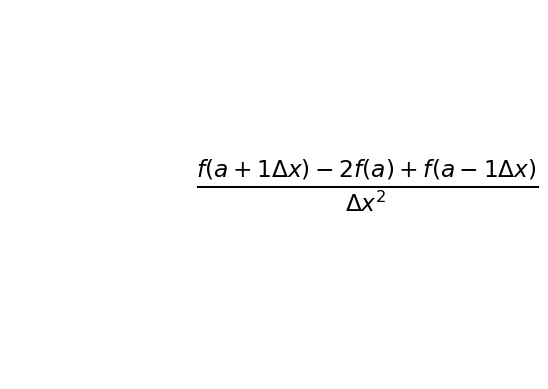

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def findMultiplier(sol):
    # This function will seek to convert fractional coefficients to integers
    # so output looks neat
    multiplier = 1
    count = 1
    while True:
        solNew = sol * multiplier
        solNew_ints = (np.rint(solNew)).astype(int)
        diff = abs(solNew_ints - solNew)
        if max(diff) < 1e-4:
            break
        if count == 1000:
            multiplier = 1
            break
        multiplier = multiplier + 1
        count = count + 1
    return multiplier

def printDifferenceFormula(derivativeOrder, scheme, accuracyOrder):
    # Build and solve the linear system generated by equating the sum of certain terms
    # of the Taylor expansion to zero 
    if scheme == 'central':
        if (derivativeOrder + accuracyOrder) % 2 == 0:
            if accuracyOrder % 2 == 1:
                accuracyOrder = accuracyOrder + 1
            else:
                accuracyOrder = accuracyOrder - 1

        array = [np.ones(derivativeOrder + accuracyOrder)]
        for j in range(1, derivativeOrder + accuracyOrder):
            row = np.zeros(derivativeOrder + accuracyOrder)
            
            for i in range(1, derivativeOrder + accuracyOrder + 1):
                row[i - 1] = np.power(((derivativeOrder + accuracyOrder - 1) / 2) - (i - 1), j) / math.factorial(j)

            array = np.append(array, [row], axis=0)

        rhs = (np.zeros(derivativeOrder + accuracyOrder))
        rhs[derivativeOrder] = 1

        sol = np.linalg.inv(array).dot(np.array([rhs]).T)
        denomCoeff = findMultiplier(sol)
        sol = (np.rint(sol * denomCoeff)).astype(int)

        listOfStencilPoints = []
        listOfStencilPoints.append('f(a+' + str(np.rint((derivativeOrder + accuracyOrder - 1) / 2).astype(int)) + '\Delta x)')
        for i in range(1, sol.size):
            if np.rint((derivativeOrder + accuracyOrder - 1) / 2 - i).astype(int) == 0:
                listOfStencilPoints.append('f(a)')
            elif (derivativeOrder + accuracyOrder - 1) / 2 - i > 0:
                listOfStencilPoints.append('f(a+' + str(np.rint((derivativeOrder + accuracyOrder - 1) / 2 - i).astype(int)) + '\Delta x)')
            elif (derivativeOrder + accuracyOrder - 1) / 2 - i < 0:
                listOfStencilPoints.append('f(a-' + str(np.rint(abs((derivativeOrder + accuracyOrder - 1) / 2 - i)).astype(int)) + '\Delta x)')
        
    elif scheme == 'backward' or scheme == 'forward':
        array = [np.ones(derivativeOrder + accuracyOrder)]
        for j in range(1, derivativeOrder + accuracyOrder):
            row = np.zeros(derivativeOrder + accuracyOrder)
            
            for i in range(1, derivativeOrder + accuracyOrder + 1):
                row[i - 1] = np.power(-(i - 1), j) / math.factorial(j)

            array = np.append(array, [row], axis=0)

        rhs = (np.zeros(derivativeOrder + accuracyOrder))
        rhs[derivativeOrder] = 1

        # Solve the linear system
        sol = np.linalg.inv(array).dot(np.array([rhs]).T)
        denomCoeff = findMultiplier(sol)
        sol = (np.rint(sol * denomCoeff)).astype(int)

        listOfStencilPoints = []
        if scheme == 'backward':
            listOfStencilPoints.append('f(a)')
            for i in range(1, sol.size):
                listOfStencilPoints.append('f(a-' + str(i) + '\Delta x)')
        else:
            listOfStencilPoints.append('f(a+' + str(sol.size - 1) + '\Delta x)')
            for i in range(1, sol.size):
                if sol.size - 1 - i == 0:
                    listOfStencilPoints.append('f(a)')
                else:
                    listOfStencilPoints.append('f(a+' + str(sol.size - 1 - i) + '\Delta x)')
                    
            ### Reverse sol if scheme is "forward"
            sol = np.flipud(sol)
            if derivativeOrder % 2 == 1:
                sol = -1 * sol

    string = ''

    # Generate the string that will be output eventually
    for i in range(0, sol.size):
        if sol[i] != 0:
            if i == 0:
                if sol[i] == 1:
                    string = listOfStencilPoints[i]
                else:
                    string = str(sol[i]) + listOfStencilPoints[i]
            else:
                if sol[i] > 0:
                    if sol[i] == 1:
                        string = string + '+' + listOfStencilPoints[i]
                    else:
                        string = string + '+' + str(sol[i]) + listOfStencilPoints[i]
                else:
                    if sol[i] == -1:
                        string = string + '-' + listOfStencilPoints[i]  
                    else:
                        string = string + str(sol[i]) + listOfStencilPoints[i]

    if derivativeOrder > 1:
        if denomCoeff > 1:
            string = '\\frac{' + string + '}{' + str((denomCoeff)) + '\Delta x^{' + str(derivativeOrder) + '}}'
        else:
            string = '\\frac{' + string + '}{\Delta x^{' + str(derivativeOrder) + '}}'
    else:
        if denomCoeff > 1:
            string = '\\frac{' + string + '}{' + str((denomCoeff)) + '\Delta x}'
        else:
            string = '\\frac{' + string + '}{\Delta x}'
    
    new_string = string.replace("[", "" ).replace("]", "" )
    plt.text(0.5 - 0.5*(sol.size/12), 0.5, '$%s$' % new_string, fontsize=24)
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    printDifferenceFormula(2, 'central', 1)
